In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import numpy as np
import pandas as pd 

import torch
import torch.nn as nn
from torchvision import datasets, transforms, models
from torch.autograd import Variable
from matplotlib import pyplot as plt
from numpy import mean
import os
from PIL import Image

In [ ]:
test_data =pd.read_csv('/content/gdrive/MyDrive/lab/softcomputing/assignment2/Dataset_2/verification_test.csv')
train_data = pd.read_csv('/content/gdrive/MyDrive/lab/softcomputing/assignment2/Dataset_2/verification_train.csv')

In [ ]:
test_label=test_data['label']

train_label=train_data['label']
data_names=[test_label,train_label]
all_labels=pd.concat(data_names,ignore_index=True)

In [ ]:
data_name=[test_data,train_data]
all_image=pd.concat(data_name,ignore_index=True)
all_image=all_image.drop(labels='label',axis=1)
print(all_image.shape)

(70000, 784)


In [ ]:
all_image=all_image/255.0
all_image=all_image.values.reshape(-1,28,28,1)

0


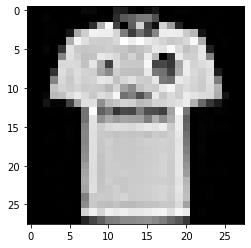

In [ ]:
import matplotlib.pyplot as plt 
import numpy as np

show_img = all_image[0].reshape(28, 28)
plt.imshow(show_img, cmap='gray')
print(all_labels[0])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(all_image, all_labels, test_size=0.2)

In [ ]:
train_dataset = list(zip(X_train,y_train))
test_dataset = list(zip(X_test,y_test))
print(len(train_dataset))
print(len(test_dataset))

56000
14000


In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

# Hyperparameters
batch_size = 150
num_iters = 50000
input_dim = 28*28 
num_hidden = 200
output_dim = 10
num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
learning_rate = 0.01

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")



train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)   # It's better to shuffle the whole training dataset! 

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False) 


In [ ]:
import torch.nn as nn
class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
       
        self.linear_1 = nn.Linear(input_size, num_hidden)
        
        self.relu_1 = nn.ReLU()
 
        
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        
        self.relu_2 = nn.ReLU()
 
        
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        
        self.relu_3 = nn.ReLU()
 
         
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        
        self.relu_4 = nn.ReLU()
 
         
        
 
        
        self.linear_out = nn.Linear(num_hidden, num_classes)
 
    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)
 
        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_3(out)
 
        out  = self.linear_4(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_4(out)
 
       
        
        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas
 
# INSTANTIATE MODEL CLASS
 
model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim,
                               num_hidden = num_hidden)
# To enable GPU
model.to(device)
 
# INSTANTIATE LOSS & OPTIMIZER CLASS
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

Iteration_loss =[] 
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
 
        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)
 
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
 
        # Forward pass to get output/logits
        outputs = model(images.float()) 
 
        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)
 
        # Getting gradients w.r.t. parameters
        loss.backward()
 
        # Updating parameters
        optimizer.step()
 
        iter += 1
 
        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)
 
                # Forward pass only to get logits/output
                outputs = model(images.float())
 
                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)
 
                # Total number of labels
                total += labels.size(0)
 
 
                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()
 
            accuracy = 100 * correct.item() / total
 
            # Print Loss
            Iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 2.2611207962036133. Accuracy: 24.885714285714286
Iteration: 1000. Loss: 1.3852461576461792. Accuracy: 47.17142857142857
Iteration: 1500. Loss: 1.0333728790283203. Accuracy: 60.44285714285714
Iteration: 2000. Loss: 0.8532564640045166. Accuracy: 67.45
Iteration: 2500. Loss: 1.0420488119125366. Accuracy: 67.18571428571428
Iteration: 3000. Loss: 0.6859084367752075. Accuracy: 75.9
Iteration: 3500. Loss: 0.6232917904853821. Accuracy: 77.87857142857143
Iteration: 4000. Loss: 0.529526948928833. Accuracy: 78.48571428571428
Iteration: 4500. Loss: 0.5981535315513611. Accuracy: 79.92142857142858
Iteration: 5000. Loss: 0.5668898820877075. Accuracy: 79.95
Iteration: 5500. Loss: 0.5132343769073486. Accuracy: 80.98571428571428
Iteration: 6000. Loss: 0.6777986884117126. Accuracy: 81.2
Iteration: 6500. Loss: 0.39927908778190613. Accuracy: 82.05714285714286
Iteration: 7000. Loss: 0.5363450646400452. Accuracy: 82.5
Iteration: 7500. Loss: 0.42920395731925964. Accuracy: 82.2
Iteration:

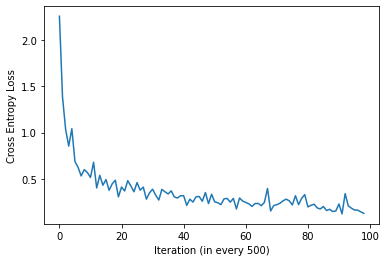

In [ ]:
plt.plot(Iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()